In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score , roc_auc_score ###Importing the required libraries


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shiv\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Shiv\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
data = pd.read_csv('transfusion.data') ##reading the dataset with the help of pandas library using pd.read_csv!!!

In [3]:
data.head(10)   ###Viewing the first 10 lines of the dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [4]:
print(data.shape)
data.isnull().sum()   ###dataset doesnot contains any null vlues so we can move to further process

(748, 5)


Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [5]:
data.info()   ##Viewing the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.rename(columns = {'whether he/she donated blood in March 2007':'Target'} ,inplace= True)
data.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1


In [8]:
data['Target'].value_counts(normalize=True)*100  ###The Percentage Of the the Target variable

0    76.203209
1    23.796791
Name: Target, dtype: float64

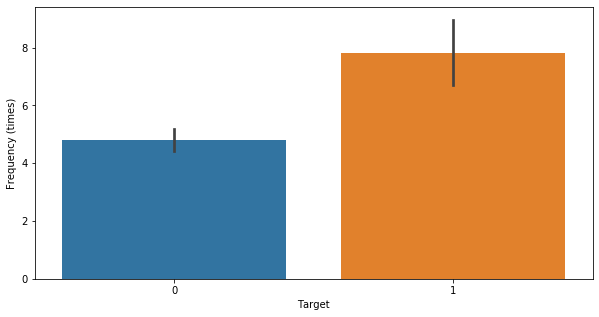

In [9]:
plt.figure(figsize =(10,5))
sns.barplot(data['Target'] ,data['Frequency (times)'], data =data )

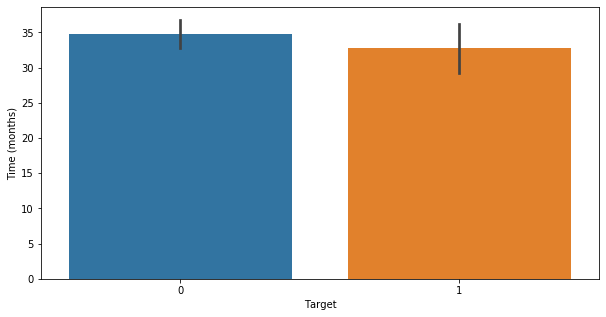

In [10]:
plt.figure(figsize =(10,5))
sns.barplot(data['Target'] ,data['Time (months)'], data =data )

In [11]:
X  = data.drop('Target' ,axis =1)  ####Taking X as a independant Variable 
y  = data['Target']    #### Taking y as a dependant variable

In [12]:
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Target, dtype: int64

# Dividing the Data Into Train-Test-Split and Using TPOTClassifier for Getting the best Pipeline.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [15]:
tpot = TPOTClassifier(generations=5,population_size=20,verbosity=2,scoring='roc_auc',
                      random_state=42,disable_update_check=True,config_dict='TPOT light')
tpot.fit(X_train, y_train)                                                                  # AUC score for tpot model

tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

                                                                                            # Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7404298622293791

Generation 2 - Current best internal CV score: 0.7404298622293791

Generation 3 - Current best internal CV score: 0.7485619073179459

Generation 4 - Current best internal CV score: 0.7485619073179459

Generation 5 - Current best internal CV score: 0.7485619073179459

Best pipeline: LogisticRegression(PCA(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=8, min_samples_leaf=13, min_samples_split=10), iterated_power=2, svd_solver=randomized), C=25.0, dual=False, penalty=l2)

AUC score: 0.7517

Best pipeline steps:
1. StackingEstimator(estimator=DecisionTreeClassifier(max_depth=8,
                                                   min_samples_leaf=13,
                                                   min_samples_split=10,
                                                   random_state=42))
2. PCA(iterated_power=2, random_state=42, svd_solver='randomized')
3. LogisticRegression(C=25.0, random_state=42)


In [16]:
X_train_norm , X_test_norm = X_train.copy(), X_test.copy()

In [17]:
normal_col = X_train_norm['Monetary (c.c. blood)']

for df_ in [X_train_norm, X_test_norm]:
    df_['monetary_log'] = np.log(df_['Monetary (c.c. blood)'])
    df_.drop(columns ='Monetary (c.c. blood)', inplace=True)

In [18]:
df_.head()

,Recency (months),Frequency (times),Time (months),monetary_log
580,2,1,2,5.521461
356,16,6,40,7.313220
133,4,6,35,7.313220
250,11,2,11,6.214608
299,14,2,14,6.214608


# Training Our Model With The Logistic Regression

In [19]:
log =  LogisticRegression(solver='liblinear',random_state=42)

log.fit(X_train_norm, y_train)
print('Training is Succesfully Completed')

Training is Succesfully Completed


In [20]:
log_auc_score = roc_auc_score(y_test, log.predict_proba(X_test_norm)[:, 1])
print(f'\nAUC score: {log_auc_score:.4f}')


AUC score: 0.7661


# Training Our Model With Decision Tree Classifier

In [21]:
Tree =DecisionTreeClassifier(max_depth=8,min_samples_leaf=13,min_samples_split=10,random_state=42)
Tree.fit(X_train ,y_train)
print("Training is completed with the Decision Tree")

Training is completed with the Decision Tree


In [22]:
tree_auc_score = roc_auc_score(y_test, Tree.predict_proba(X_test_norm)[:, 1])
print(f'\nAUC score: {tree_auc_score:.4f}')


AUC score: 0.6523


# Conclusion Of the Model

In [23]:
sorted(
    [('tpot', tpot_auc_score), ('log', log_auc_score)],
    key=itemgetter(1), 
    reverse=False)

[('tpot', 0.7516666666666666), ('log', 0.7661111111111112)]

### The Accuracy of the decision tree is less compared to Logistic Regression